In [1]:
from rice_ml.unsupervised_learning.dbscan import DBScan 
import sklearn as sk
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np





In [2]:
'''
X, y = sk.datasets.make_moons(n_samples=100, shuffle=True, noise=.01, random_state=True)
# Generate a dataset with 100 samples and some noise

# Plot the generated data
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Moon 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Moon 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Two Moons Dataset')
plt.legend()
plt.show()
'''

"\nX, y = sk.datasets.make_moons(n_samples=100, shuffle=True, noise=.01, random_state=True)\n# Generate a dataset with 100 samples and some noise\n\n# Plot the generated data\nplt.scatter(X[y == 0, 0], X[y == 0, 1], label='Moon 0')\nplt.scatter(X[y == 1, 0], X[y == 1, 1], label='Moon 1')\nplt.xlabel('Feature 1')\nplt.ylabel('Feature 2')\nplt.title('Two Moons Dataset')\nplt.legend()\nplt.show()\n"

X shape: (402, 2)
Number of clusters (excluding outliers): 2


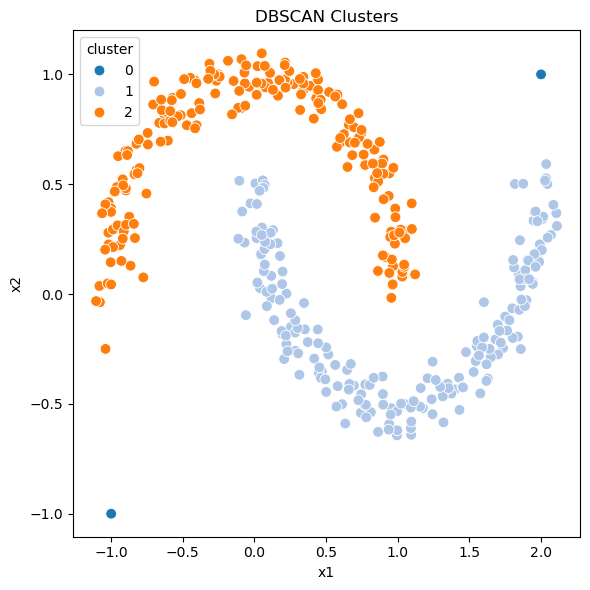

[1 1 2 1 2 2 1 2 1 2 2 1 2 2 2 2 1 1 1 1 2 2 1 1 2 1 2 1 1 2 1 2 1 2 1 2 2
 1 2 2 1 2 2 2 2 1 2 2 2 2 2 1 1 2 1 2 1 2 2 2 2 1 1 2 2 2 1 1 1 2 1 2 2 2
 1 1 1 1 2 1 2 2 1 1 1 2 1 1 2 2 1 1 2 1 2 1 1 1 1 2 1 2 2 2 2 2 2 2 1 1 2
 1 1 1 1 2 2 1 1 1 2 2 2 1 2 2 1 1 2 1 1 2 1 2 2 2 1 1 1 1 2 2 1 2 2 1 2 2
 2 1 2 1 1 2 2 2 2 2 1 1 1 1 1 2 1 2 1 2 2 1 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2
 2 1 1 1 2 2 2 1 2 1 1 1 1 1 1 2 1 1 1 1 2 2 2 1 2 1 2 2 1 1 2 1 1 1 1 1 2
 1 2 2 2 2 1 2 1 2 1 1 2 2 1 1 1 1 1 1 2 2 1 2 2 1 2 1 1 2 1 2 1 2 1 2 2 1
 2 2 2 2 2 2 2 1 1 1 2 2 1 1 1 2 2 1 1 1 1 2 1 1 2 1 1 1 2 2 1 2 2 2 1 1 1
 2 1 1 1 1 2 1 2 2 2 2 2 2 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2
 1 1 2 2 2 2 2 1 2 1 2 1 2 1 1 1 2 1 2 1 2 1 1 2 1 1 1 1 2 2 2 2 1 2 2 2 2
 1 1 1 2 1 2 1 2 1 1 1 1 2 2 2 1 2 1 2 1 1 2 1 2 2 2 2 1 1 2 0 0]


In [5]:
X, _ = sk.datasets.make_moons(n_samples=400, noise=0.07, random_state=42)
X = np.vstack((X,[-1,-1],[2,1]))


print("X shape:", X.shape)  # should be (315, 2)

model = DBScan(eps=0.3, min_samples=3, metric="euclidean")
labels, n_clusters = model.fit_predict(X)

print("Number of clusters (excluding outliers):", n_clusters)
df = pd.DataFrame({
    "x1": X[:, 0],
    "x2": X[:, 1],
    "cluster": labels
})


plt.figure(figsize=(6, 6))
sns.scatterplot(
    data=df,
    x="x1",
    y="x2",
    hue="cluster",      
    palette="tab20",
    s=60,
)

plt.title("DBSCAN Clusters")
plt.tight_layout()
plt.show()

print(labels)

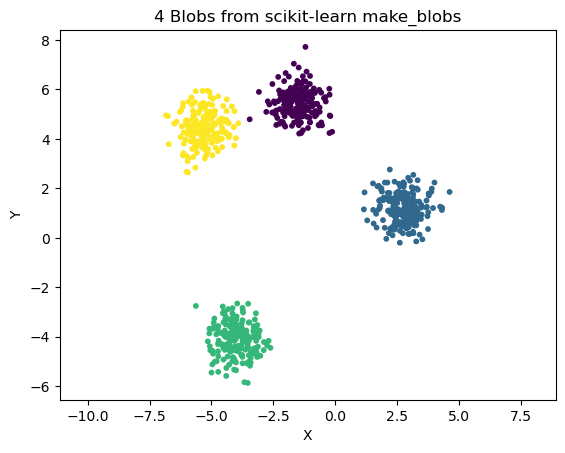

Number of clusters (excluding outliers): 3


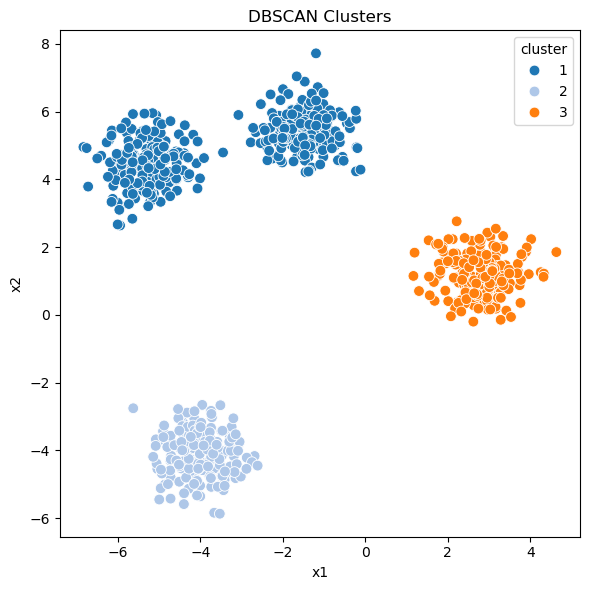

[1 2 3 3 3 1 1 1 2 1 3 2 1 2 1 1 1 3 1 1 2 2 1 1 1 2 3 1 1 3 1 1 1 2 3 3 1
 2 2 3 2 3 1 1 1 1 1 1 1 2 1 3 2 2 1 1 2 3 1 1 1 2 1 3 1 1 1 1 1 3 1 1 3 1
 3 1 1 1 1 3 1 2 1 3 2 3 1 1 1 1 1 1 2 2 1 2 3 1 1 1 2 3 1 2 1 2 2 3 3 1 1
 1 2 1 2 1 1 2 3 2 1 2 3 1 1 1 2 1 1 3 1 1 3 3 2 2 1 1 3 1 3 1 1 1 1 1 2 1
 3 3 3 1 1 1 1 3 1 2 2 1 1 1 3 3 2 1 1 1 1 2 2 1 1 2 1 1 3 3 2 3 3 2 1 1 2
 1 2 2 2 3 1 1 2 1 1 3 1 3 2 3 1 2 3 1 1 3 3 3 2 1 2 2 1 3 3 2 1 1 1 3 1 2
 1 1 3 1 3 2 1 1 1 1 1 3 1 1 2 3 1 2 1 2 2 3 3 1 1 3 1 3 1 1 2 2 1 3 2 1 2
 3 3 1 1 3 2 1 3 2 2 2 3 2 2 3 1 1 1 1 1 1 2 1 1 3 1 2 1 3 2 1 3 2 1 1 1 1
 2 2 2 2 3 1 3 2 1 3 2 1 1 1 2 3 1 1 3 1 2 3 3 1 3 2 3 1 1 1 3 3 1 1 1 1 2
 2 3 1 1 2 2 1 1 1 2 2 2 3 1 3 1 3 1 3 2 1 1 1 3 1 1 3 1 1 1 3 1 1 2 1 2 3
 3 1 1 1 1 1 1 1 1 1 1 1 3 3 1 2 1 2 1 1 1 1 3 1 1 2 3 1 1 1 3 1 1 1 1 1 1
 1 1 2 1 1 1 3 2 1 2 3 2 2 2 1 3 2 3 3 3 2 2 2 1 1 3 3 3 1 1 2 1 1 1 2 1 1
 1 1 2 1 1 1 1 3 3 1 1 3 1 3 1 3 2 2 1 3 3 2 3 1 1 2 2 3 1 1 2 1 1 2 2 1 1
 1 3 1 1 3 2 1 1 2 1 1 2 

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# 4 blobs, 2 features (x, y)
X, y = make_blobs(
    n_samples=800,        # total points
    n_features=2,         # x and y
    centers=4,            # 4 blobs
    cluster_std=0.6,      # spread of each blob
    center_box=(-6, 6),   # range within which centers are randomly placed
    random_state=42       # reproducibility
)

# X is an (800, 2) array of coordinates
# y is an array of length 800 with blob labels (0,1,2,3)

plt.scatter(X[:, 0], X[:, 1], c=y, s=10)
plt.title("4 Blobs from scikit-learn make_blobs")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis("equal")
plt.show()


model = DBScan(eps=0.5, min_samples=4, metric="euclidean")
labels, n_clusters = model.fit_predict(X)

print("Number of clusters (excluding outliers):", n_clusters)
df = pd.DataFrame({
    "x1": X[:, 0],
    "x2": X[:, 1],
    "cluster": labels
})


plt.figure(figsize=(6, 6))
sns.scatterplot(
    data=df,
    x="x1",
    y="x2",
    hue="cluster",      
    palette="tab20",
    s=60,
)

plt.title("DBSCAN Clusters")
plt.tight_layout()
plt.show()

print(labels)